In [112]:
import numpy as np
from keras import models
from keras import layers
from keras.datasets import boston_housing

import matplotlib.pyplot as plt

In [18]:
(train_data,train_labels),(test_data,test_labels)=boston_housing.load_data()

train_data=(train_data-train_data.mean(axis=0))/train_data.std(axis=0)

In [19]:
print(train_data.shape,train_labels.shape)
print(train_data[10])
print(train_labels[10])

(404, 13) (404,)
[ 0.63391647 -0.48361547  1.0283258  -0.25683275  1.15788777  0.19313958
  1.11048828 -1.03628262  1.67588577  1.5652875   0.78447637  0.22689422
  1.04466491]
12.1


In [91]:
def build_model(train_data):
    model=models.Sequential()
    model.add(layers.Dense(64,activation='relu',input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop',loss='mse',metrics=['mae'])
    return model
              

In [174]:
epochs=80
def create_k_folds(k_folds,train_data,train_labels,epochs=500):
    fold_size=train_data.shape[0]/k_folds

    folds_all=dict()
    
    for k in range(k_folds):
        fold_start,fold_end=int(k*fold_size),int((k+1)*fold_size)
        
        folds_all[k]=[train_data[fold_start:fold_end], #Index 0: Train data
                    train_labels[fold_start:fold_end]] #Index 1: Train labels
        
        print('Fold {0} is -> [{1} to {2}]'.format(k,fold_start,fold_end))
        
    all_mae_histories = []
    for k in range(k_folds):        
        x,x_val,y,y_val=None,None,None,None
        for k_other in range(k_folds):
            if k_other == k:
                x_val,y_val=folds_all[k_other]
            else:
                if not isinstance(x,np.ndarray):
                    x,y=folds_all[k_other]
                else:
                    x=np.concatenate([x,folds_all[k_other][0]]) #Index 0: Train data
                    y=np.concatenate([y,folds_all[k_other][1]]) #Index 1: Train labels
        print('Processing fold {0} -> [points {1} to {2}]'.format(k,fold_start,fold_end))
        model=build_model(train_data=x)
        history=model.fit(x,y
                          ,validation_data=(x_val,y_val)
                          ,epochs=epochs
                          ,batch_size=1
                          ,verbose=False)
        mae_history = history.history['val_mean_absolute_error']
        all_mae_histories.append(mae_history)
        print('*'*100)
        
    return all_mae_histories


# all_mae_histories_dummy=create_k_folds(k_folds=3
#                                       ,train_data=np.array([[1,2],[3,4],[5,6]])
#                                       ,train_labels=np.array([-1,-2,-3])
#                                       ,epochs=epochs)
all_mae_histories=create_k_folds(k_folds=3,train_data=train_data,train_labels=train_labels)

Fold 0 is -> [0 to 134]
Fold 1 is -> [134 to 269]
Fold 2 is -> [269 to 404]
Processing fold 0 -> [points 269 to 404]
****************************************************************************************************
Processing fold 1 -> [points 269 to 404]
****************************************************************************************************
Processing fold 2 -> [points 269 to 404]
****************************************************************************************************


3.1969709280733465


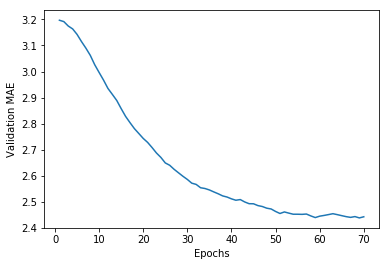

In [175]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

def plot_k_fold(all_mae_histories,epochs,skip_fist=10):
    average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(epochs)]
    average_mae_history=average_mae_history[skip_fist:]
    average_mae_history=smooth_curve(average_mae_history)
    print(average_mae_history[0])

    import matplotlib.pyplot as plt
    plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
    plt.xlabel('Epochs')
    plt.ylabel('Validation MAE')
    plt.show()

plot_k_fold(all_mae_histories,epochs=epochs)

In [189]:
final_model=build_model(train_data)

final_model.fit(train_data, train_labels,
        epochs=80, batch_size=16)

Epoch 1/80
404/404 [==============================] - 1s 2ms/step - loss: 563.8634 - mean_absolute_error: 21.9816
Epoch 2/80
404/404 [==============================] - 0s 62us/step - loss: 517.0021 - mean_absolute_error: 20.9557
Epoch 3/80
404/404 [==============================] - 0s 64us/step - loss: 471.9896 - mean_absolute_error: 19.9274
Epoch 4/80
404/404 [==============================] - 0s 57us/step - loss: 424.0967 - mean_absolute_error: 18.7836
Epoch 5/80
404/404 [==============================] - 0s 62us/step - loss: 374.2162 - mean_absolute_error: 17.5033
Epoch 6/80
404/404 [==============================] - 0s 57us/step - loss: 323.9189 - mean_absolute_error: 16.0726
Epoch 7/80
404/404 [==============================] - 0s 62us/step - loss: 274.8745 - mean_absolute_error: 14.5296
Epoch 8/80
404/404 [==============================] - 0s 57us/step - loss: 229.7040 - mean_absolute_error: 12.9345
Epoch 9/80
404/404 [==============================] - 0s 64us/step - loss: 189.24

404/404 [==============================] - 0s 67us/step - loss: 9.3935 - mean_absolute_error: 2.1090
Epoch 73/80
404/404 [==============================] - 0s 64us/step - loss: 9.4468 - mean_absolute_error: 2.0960
Epoch 74/80
404/404 [==============================] - 0s 62us/step - loss: 9.2365 - mean_absolute_error: 2.0856
Epoch 75/80
404/404 [==============================] - 0s 54us/step - loss: 9.2556 - mean_absolute_error: 2.0895
Epoch 76/80
404/404 [==============================] - 0s 54us/step - loss: 9.0790 - mean_absolute_error: 2.0779
Epoch 77/80
404/404 [==============================] - 0s 54us/step - loss: 9.1062 - mean_absolute_error: 2.0604
Epoch 78/80
404/404 [==============================] - 0s 57us/step - loss: 8.9800 - mean_absolute_error: 2.0681
Epoch 79/80
404/404 [==============================] - 0s 62us/step - loss: 8.9981 - mean_absolute_error: 2.0721
Epoch 80/80
404/404 [==============================] - 0s 57us/step - loss: 8.9433 - mean_absolute_error: 2.

In [190]:
test_mse_score,test_mae_score=final_model.evaluate(test_data,test_labels)
print('Absolute $ error: {0}'.format(round(test_mae_score,2)))

102/102 [==============================] - 0s 3ms/step
Absolute $ error: 1438.61
